# **<span style='color:Blue'> Lead Score Case Study </span>**

###### Lead Scoring Case Study¶
Problem Statement : An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# To display all the columns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows',50)

## Step-1: Reading and Understanding the data

In [4]:
# Read the csv file using pandas
data=pd.read_csv("Leads.csv")
data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


## 1.1. Inspecting data and cleaning

In [5]:
data.shape

(9240, 37)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

#### Interference:  
- There are quite a few categorical variables present in this dataset for which we will need to create dummy variables.     
- Also, there are a lot of null values present as well, so we will need to treat them accordingly.

In [7]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
data.isnull().sum().sort_values(ascending=False)/len(data)

Lead Quality                                     0.515909
Asymmetrique Profile Score                       0.456494
Asymmetrique Activity Score                      0.456494
Asymmetrique Profile Index                       0.456494
Asymmetrique Activity Index                      0.456494
Tags                                             0.362879
What matters most to you in choosing a course    0.293182
Lead Profile                                     0.293182
What is your current occupation                  0.291126
Country                                          0.266342
How did you hear about X Education               0.238853
Specialization                                   0.155628
City                                             0.153680
TotalVisits                                      0.014827
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Do Not Email  

In [10]:
data.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

### Interference:
1.There are a lot of columns which have high number of missing values. Clearly, these columns are not useful.

2.Eliminating columns with more than 30% missing values. Also, Lead Quality and Tags seems to be values entered by employees.

In [11]:
# Drop all the columns in which greater than 3000 missing values are present

for c in data.columns:
    if data[c].isnull().sum()>3000:
        data.drop(c,1,inplace=True)

In [12]:
data.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Converted                                           0
Total Time Spent on Website                         0
Do Not Call                                         0
Last Notable Activity                               0
A free copy of Mastering The

In [13]:
print(data.City.value_counts(normalize=True))
print(data.Country.value_counts(normalize=True))

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: City, dtype: float64
India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
South Africa            0.000590
Germany                 0.000590
Canada                  0.000590
Nigeria                 0.000590
Kuwait                  0.000590
Sweden                  0.000443
Belgium                 0.000295
Asia/Pacific Region     0.000295


###### Interference :
It seems that the variable City & country won't be of any use in our analysis. 
City has around 41% as value Mumbai and other categories also someway point towards Mumbai.It also has 28.7% as 'select', which people left to choose. Also Country has 95% values as India. 
As both of them don't have enough representation of other cities and countries it's better to drop them.

In [14]:
data.drop(['City'],axis=1,inplace=True)

In [15]:
data.drop(['Country'],axis=1,inplace=True)

In [16]:
data.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
Total Time Spent on Website                         0
Last Notable Activity                               0
A free copy of Mastering The Interview              0
Search                                              0
Magazine                    

In [17]:
# Checking for duplicate rows
data[data.duplicated()== True]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [18]:
#Dropping Prospect ID and Lead Number as they are kind of reference ids for the leads.
data.drop(labels=['Prospect ID','Lead Number'],axis=1,inplace=True)
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified


In [19]:
# Get the value counts of all columns

for c in data:
    print(data[c].astype('category').value_counts())
    print("___________________________________________________")

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
___________________________________________________
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64
___________________________________________________
No     8506
Yes     734
Name: Do Not Email, dtype: int64
___________________________________________________
No     9238
Yes  

#### Interference : 
- There are few columns in which there is a level called 'Select' which basically means that the customer has not selected the option for that particular column which is why it shows as 'Select'.
- These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.
- Many of the columns has a constant value or has very less variability, such as 'I agree to pay the amount through cheque', 'Magazine'.

In [20]:
#Check category wise count 
for col in ['Lead Profile','How did you hear about X Education','Specialization']:
    print(data[col].value_counts(normalize=True)*100)


Select                         63.481856
Potential Lead                 24.697596
Other Leads                     7.456745
Student of SomeSchool           3.690093
Lateral Student                 0.367478
Dual Specialization Student     0.306232
Name: Lead Profile, dtype: float64
Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64
Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management        

###### Interference : 
The levels of 'Lead Profile' and 'How did you hear about X Education' have have more than 60% values as 'Select' which basically are null values. So it's best that we drop those columns.

In [21]:
data.drop(['Lead Profile','How did you hear about X Education'] ,axis=1, inplace=True)

#### Observation:
We can notice that there were a few columns in which only one value was majorly present for all the data points. They are,
- Do Not Call, 
- Search, 
- Magazine, 
- Newspaper Article, 
- X Education Forums, 
- Newspaper, 
- Digital Advertisement, 
- Through Recommendations, 
- Receive More Updates About Our Courses, 
- Update me on Supply Chain Content, 
- Get updates on DM Content, 
- I agree to pay the amount through cheque
- What matters most to you in choosing a course

All as of the above varibales doesn't contribute to variability of the feature. We can eliminate all of them.

In [22]:
data.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque','What matters most to you in choosing a course'], axis = 1, inplace = True)

In [23]:
data.isnull().sum().sort_values(ascending=False)/len(data)

What is your current occupation           0.291126
Specialization                            0.155628
Page Views Per Visit                      0.014827
TotalVisits                               0.014827
Last Activity                             0.011147
Lead Source                               0.003896
Last Notable Activity                     0.000000
A free copy of Mastering The Interview    0.000000
Total Time Spent on Website               0.000000
Converted                                 0.000000
Do Not Email                              0.000000
Lead Origin                               0.000000
dtype: float64

#### Interference :
- The column "What is your current occupation" which has a lot of null values.Ideally we can drop the entire column but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis.So we can just drop the null rows for the column What is you current occupation.

In [24]:
data=data[~pd.isnull(data['What is your current occupation'])]

In [25]:
data.isnull().sum().sort_values(ascending=False)

Page Views Per Visit                      130
TotalVisits                               130
Last Activity                             103
Lead Source                                36
Specialization                             18
Last Notable Activity                       0
A free copy of Mastering The Interview      0
What is your current occupation             0
Total Time Spent on Website                 0
Converted                                   0
Do Not Email                                0
Lead Origin                                 0
dtype: int64

In [26]:
data= data[~pd.isnull(data['TotalVisits'])]

In [27]:
data= data[~pd.isnull(data['Lead Source'])]

In [28]:
data= data[~pd.isnull(data['Specialization'])]

In [29]:
data.isnull().sum().sort_values(ascending=False)/len(data)

Last Notable Activity                     0.0
A free copy of Mastering The Interview    0.0
What is your current occupation           0.0
Specialization                            0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Email                              0.0
Lead Source                               0.0
Lead Origin                               0.0
dtype: float64

###### Now our data doesn't have any null values. Let's check the percentage of rows that we have retained.

In [30]:
#Check Percentage of rows retained
print(len(data.index))
print(len(data.index)/9240)

6373
0.6897186147186147


#### So,We have  6373 observations retained,  which seems good enough.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
Lead Origin                               6373 non-null object
Lead Source                               6373 non-null object
Do Not Email                              6373 non-null object
Converted                                 6373 non-null int64
TotalVisits                               6373 non-null float64
Total Time Spent on Website               6373 non-null int64
Page Views Per Visit                      6373 non-null float64
Last Activity                             6373 non-null object
Specialization                            6373 non-null object
What is your current occupation           6373 non-null object
A free copy of Mastering The Interview    6373 non-null object
Last Notable Activity                     6373 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 647.3+ KB


##### Checking for outliers

0.5000      3.0000
0.7500      5.0000
0.9000      8.0000
0.9900     18.0000
0.9999    164.3408
1.0000    251.0000
Name: TotalVisits, dtype: float64


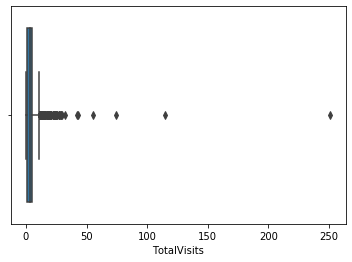

0.5000     287.0000
0.7500    1022.0000
0.9000    1428.8000
0.9900    1849.2800
0.9999    2259.8932
1.0000    2272.0000
Name: Total Time Spent on Website, dtype: float64


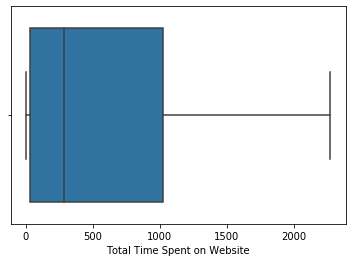

0.5000     2.0000
0.7500     3.5000
0.9000     5.0000
0.9900     9.0000
0.9999    30.1492
1.0000    55.0000
Name: Page Views Per Visit, dtype: float64


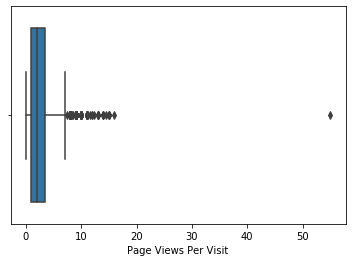

In [32]:
# Checking for outliers for numeric columns
num_col = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for cols in num_col:
    print(data[cols].quantile([0.5,0.75,0.9,0.99,0.9999,1]))
    sns.boxplot(data[cols])
    plt.show()


In [33]:
data.loc[data.TotalVisits>45]

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2190,Landing Page Submission,Direct Traffic,Yes,0,55.0,297,55.00,Page Visited on Website,IT Projects Management,Unemployed,Yes,Modified
5283,Landing Page Submission,Direct Traffic,Yes,0,74.0,1209,12.33,Page Visited on Website,Select,Unemployed,No,Page Visited on Website
5608,Landing Page Submission,Referral Sites,Yes,0,115.0,187,8.21,Page Visited on Website,Rural and Agribusiness,Unemployed,No,Page Visited on Website
6102,Landing Page Submission,Direct Traffic,No,1,251.0,49,1.48,Page Visited on Website,Supply Chain Management,Unemployed,Yes,Page Visited on Website


In [34]:
# Rows with outlier values for 'Page Views Per Visit' and 'TotalVisits' can be dropped
data = data.loc[~ (data.TotalVisits>45)]
data = data.loc[~ (data['Page Views Per Visit']>20)]
data.shape

(6369, 12)

#### Now , We can start with EDA process

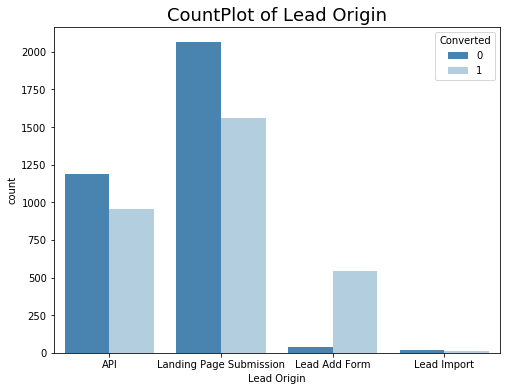

In [35]:
# count of Converted with hue=Lead Origin
plt.figure(figsize=[8,6])
sns.countplot(data=data, hue='Converted', x='Lead Origin',palette = "Blues_r")
plt.title('CountPlot of Lead Origin', fontsize=18)
plt.show()

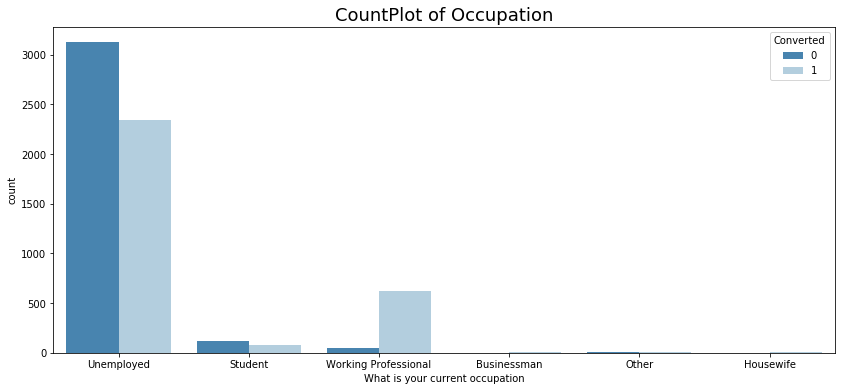

In [36]:
# count of Occupation with hue=Converted
plt.figure(figsize=[14,6])
sns.countplot(data=data, x='What is your current occupation', hue='Converted',palette = "Blues_r")
plt.title('CountPlot of Occupation', fontsize=18)
plt.show()

#### Interference : 
Most of the are leads from Unemployed category and it has high conversion compared to other categories. 
Notably there is a high conversion rate for working professionals.

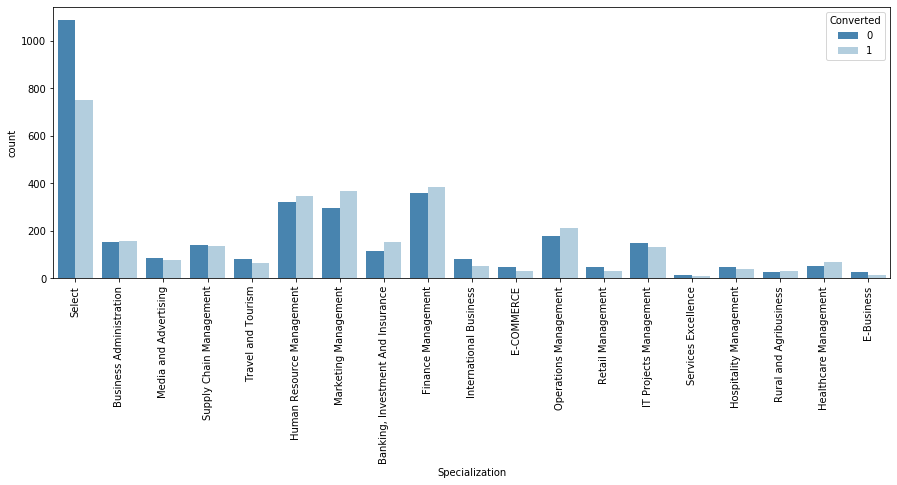

In [37]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(data.Specialization, hue=data.Converted,palette = "Blues_r")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

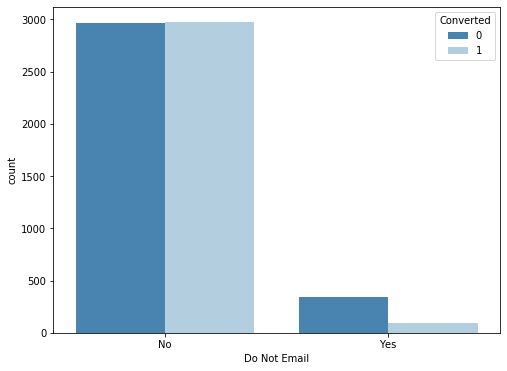

In [38]:
# Count plots of Categrorical columns having 2 yes/no

plt.figure(figsize=[8,6])
sns.countplot(data=data, x='Do Not Email' , hue='Converted',palette = "Blues_r")
plt.show()

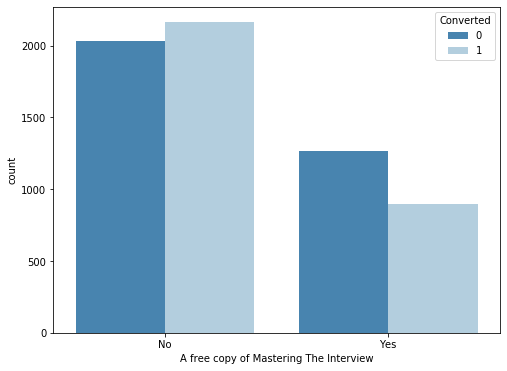

In [39]:
# Count plots of Categrorical columns having  yes/no
plt.figure(figsize=[8,6])
sns.countplot(data=data, x='A free copy of Mastering The Interview' , hue='Converted' ,palette = "Blues_r")
plt.show()

<Figure size 1080x2160 with 0 Axes>

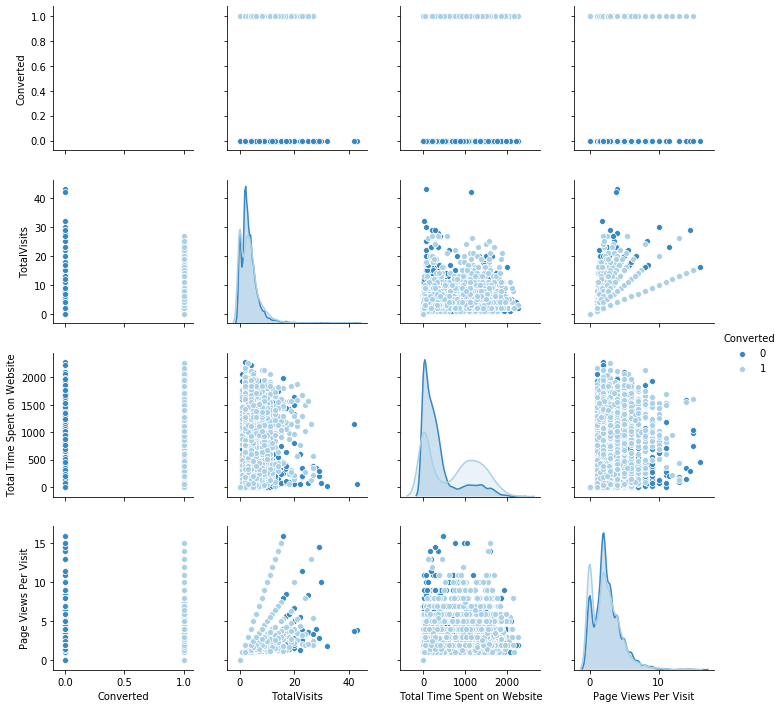

In [40]:
#Pair plot
plt.figure(figsize = (15,30))
sns.pairplot(data,hue='Converted',palette = "Blues_r")
plt.show()

##### Inference:
 Clearly Total Time Spent has a high relation to conversion. Time spent by converted leads are almost half of the time spent by non-converted leads. Whereas other numeric variables doesn’t provide significant separation between classes.

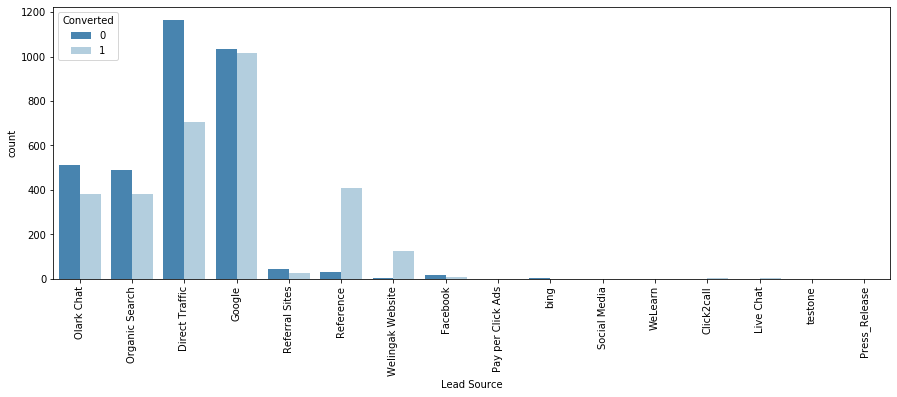

In [41]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(data['Lead Source'], hue=data.Converted,palette = "Blues_r")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Interference:
    1.Conversion Rate of reference leads and leads through welingak website is high.
    2.Maximum number of leads are generated by Google and Direct traffic.

### Step-3: Create Dummy variables

In [42]:
# Create dummy variables using the 'get_dummies' command
extra = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
data = pd.concat([data,extra], axis=1)

In [43]:
#Converting binary variables to 0/1


binlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[binlist] = data[binlist].apply(binary_map)

In [44]:
data.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [45]:
data.Specialization.value_counts(normalize=True)*100

Select                               28.842832
Finance Management                   11.697284
Human Resource Management            10.441200
Marketing Management                 10.409797
Operations Management                 6.139111
Business Administration               4.867326
IT Projects Management                4.349191
Supply Chain Management               4.302088
Banking, Investment And Insurance     4.176480
Media and Advertising                 2.527869
Travel and Tourism                    2.339457
International Business                2.135343
Healthcare Management                 1.915528
Hospitality Management                1.413095
E-COMMERCE                            1.256084
Retail Management                     1.224682
Rural and Agribusiness                0.894960
E-Business                            0.675145
Services Excellence                   0.392526
Name: Specialization, dtype: float64

In [46]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

temp= pd.get_dummies(data['Specialization'] , prefix='Specialization')
temp=temp.drop(['Specialization_Select'],1)
data =pd.concat([data,temp],axis=1)

In [47]:
# Drop the variables for which the dummy variables have been created

data = data.drop(['Lead Origin', 'Lead Source',  'Last Activity','Specialization', 'What is your current occupation','Last Notable Activity'], 1)


In [48]:
data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Step-4: Train-Test Split

In [49]:
# import model library

from sklearn.model_selection import train_test_split

In [50]:
# divide to X & y and divide data into Train and Test
X = data.drop('Converted', axis=1)
y = data.Converted

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [51]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

#### 4.1 Feature Scaling

In [53]:
# Standardization
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler= MinMaxScaler()

X_train[num_col] = scaler.fit_transform(X_train[num_col])

X_train.head()


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4034,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5214,1,0.023810,0.558979,0.066667,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
207,0,0.119048,0.157570,0.333333,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2044,0,0.047619,0.163292,0.133333,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4485,0,0.166667,0.565141,0.233333,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [55]:
# checking conversion rate
data.Converted.mean()

0.4810802323755692

There is not much class imbalance in the data as the people got converted is nearly 48%

### Step-5: Looking at Correlation

In [56]:
#Find correlation matrix
cor = round(data.corr(),2)


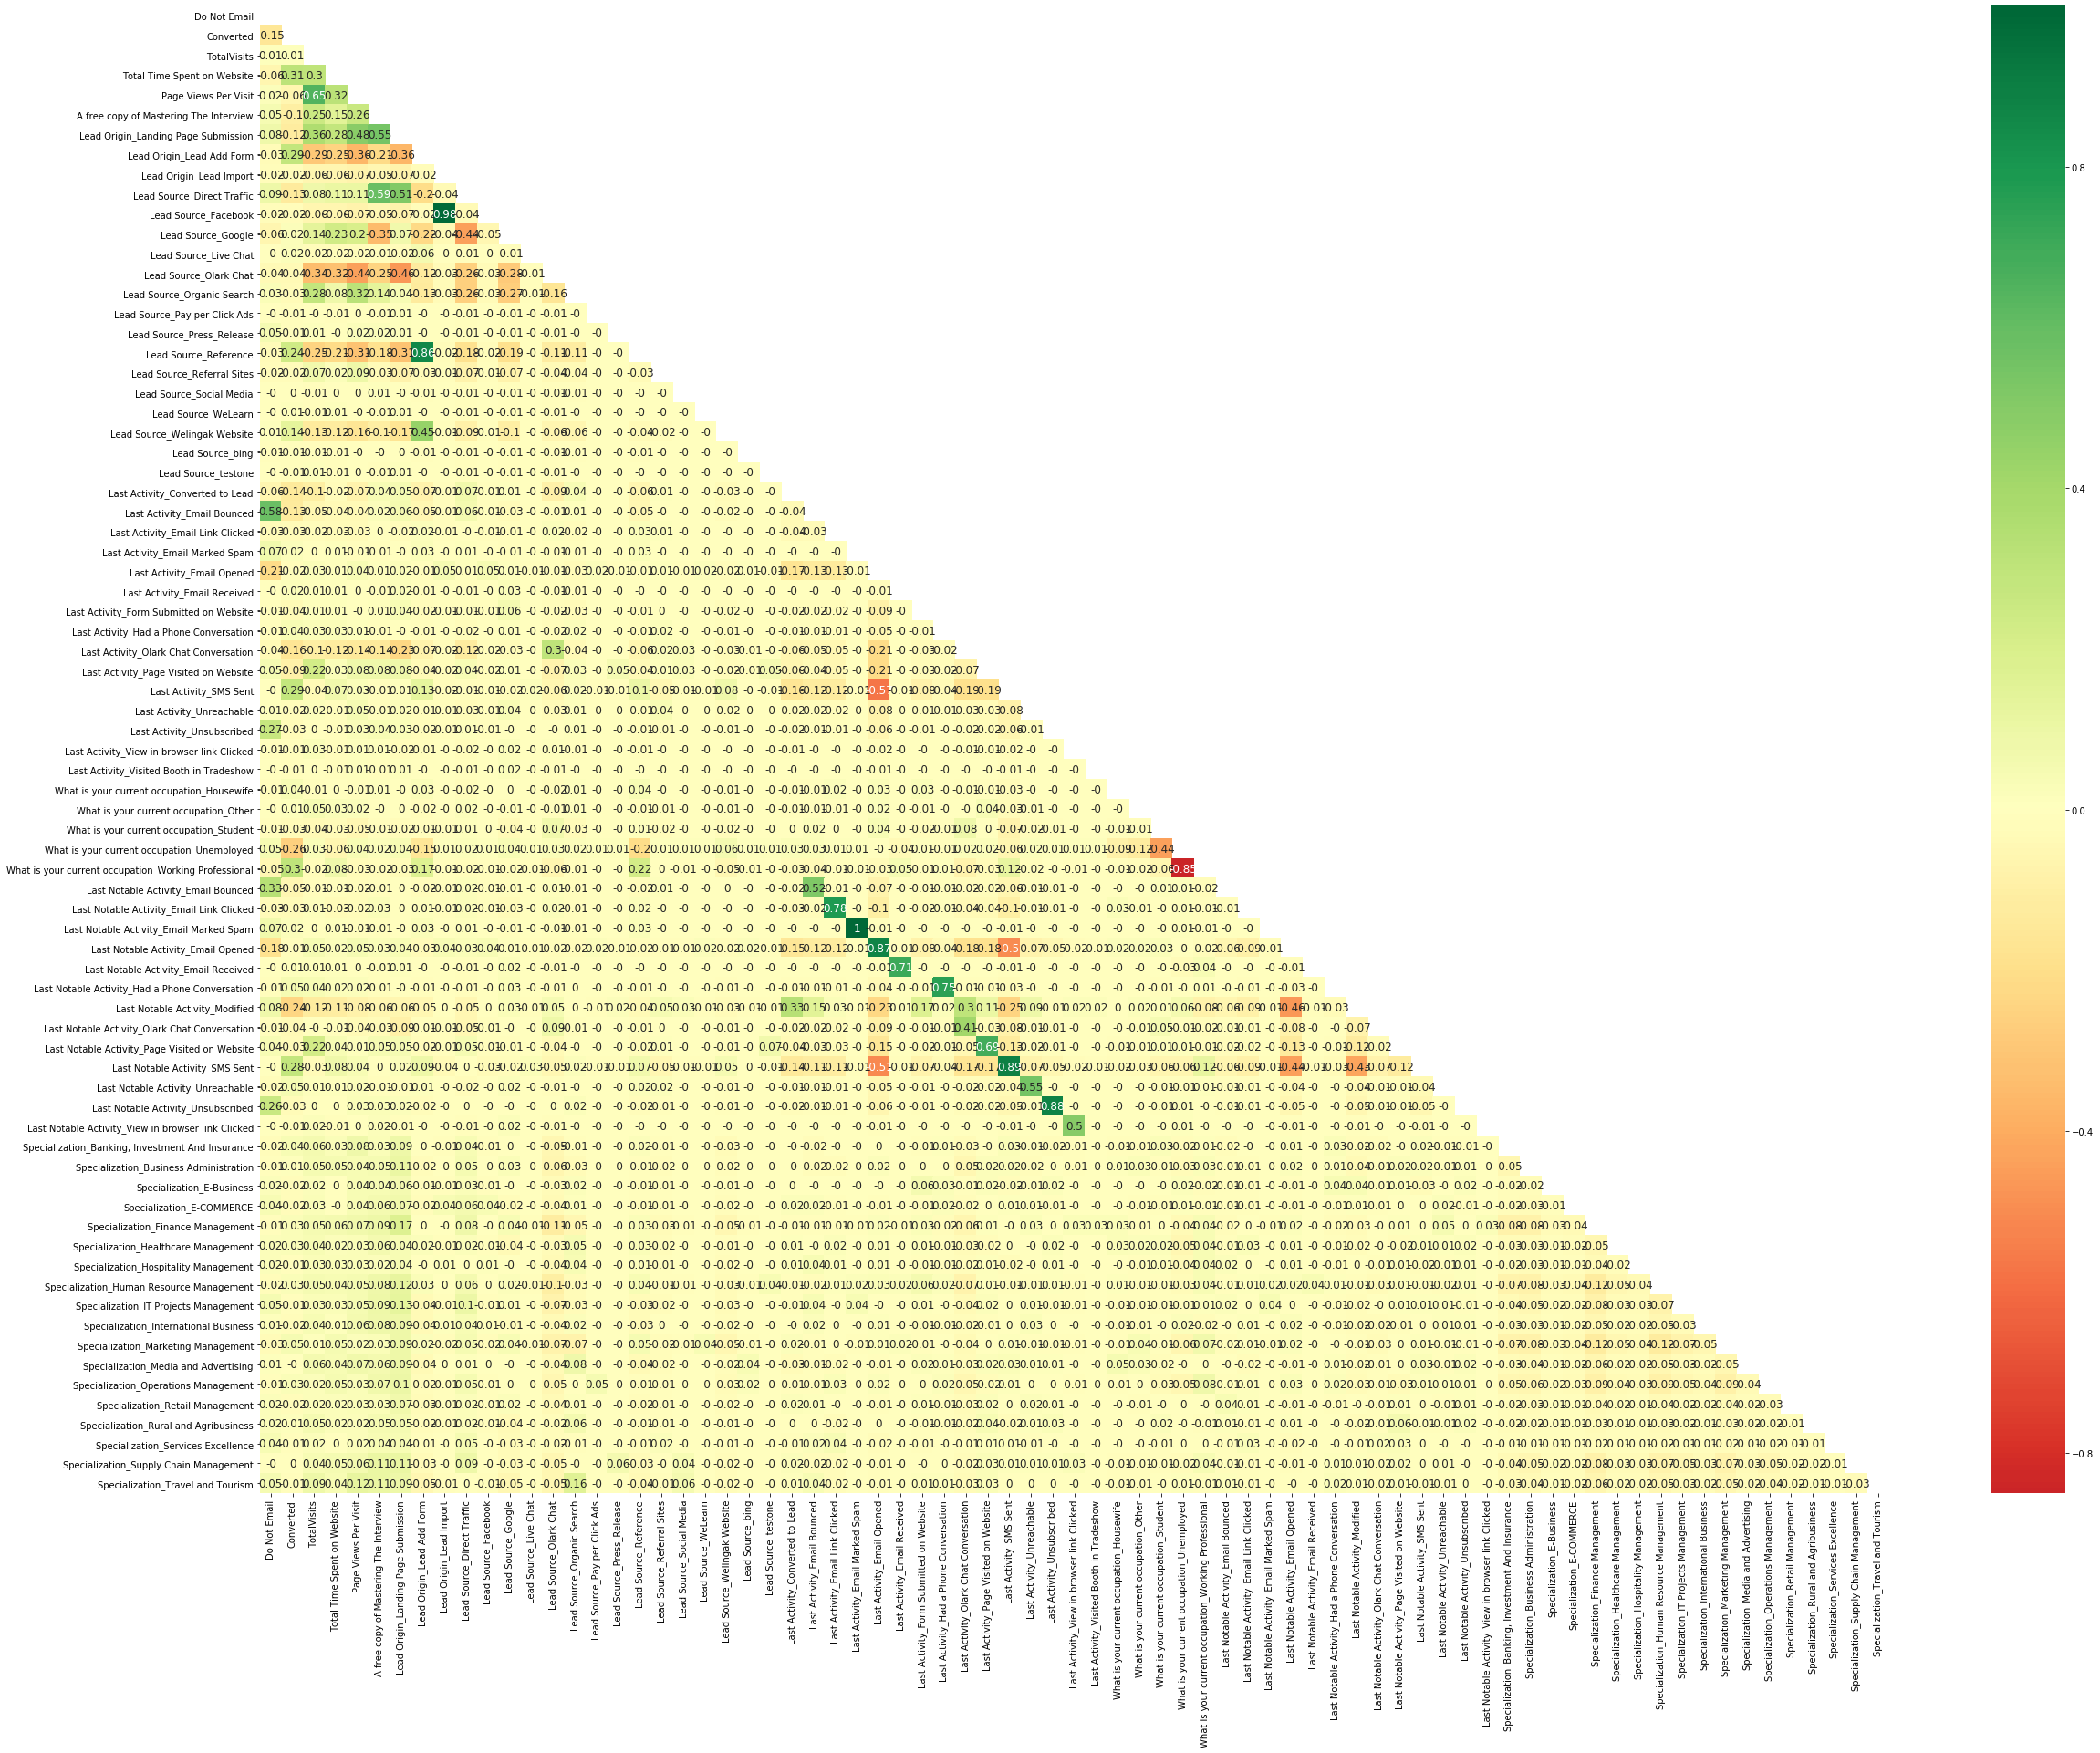

In [57]:
msk = np.zeros_like(cor)
msk[np.triu_indices_from(msk)] = True
plt.figure(figsize=(40,30))
sns.heatmap(cor,cmap="RdYlGn",mask=msk,annot=True,annot_kws={"fontsize":12},center=0)
plt.show()

###### Inference:
Looks like there is multicolinearity between the categories of a  column.

### Step-6: Model Building

In [58]:
# import sklearn library
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [59]:
# importig RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [60]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 48),
 ('Lead Origin_Landing Page Submission', False, 22),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 49),
 ('Lead Source_Direct Traffic', False, 7),
 ('Lead Source_Facebook', False, 41),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Pay per Click Ads', False, 38),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 28),
 ('Lead Source_Social Media', False, 57),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 52),
 ('Lead Source_testone', False, 37),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email 

In [61]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [62]:
X_train = X_train[col]

In [63]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable,Specialization_Hospitality Management
4034,0,0.000000,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0,0
5214,1,0.023810,0.558979,0.066667,0,0,0,0,0,0,1,0,0,0,0
207,0,0.119048,0.157570,0.333333,0,0,0,0,0,0,1,0,0,0,0
2044,0,0.047619,0.163292,0.133333,0,0,0,0,0,0,1,0,0,0,0
4485,0,0.166667,0.565141,0.233333,0,0,0,0,0,1,1,0,0,0,0


In [64]:
# import libraries statsmodel
import statsmodels.api as sm

In [65]:
# LogisticRegression Model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4458
Model:                            GLM   Df Residuals:                     4442
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2065.3
Date:                Thu, 11 Nov 2021   Deviance:                       4130.5
Time:                        20:49:54   Pearson chi2:                 4.89e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1449      0.229     -9.387      0.000      -2.593      -1.697
Do Not Email                                            -1.3837      0.191     -7.249      0.000      -1.758      -1.010
TotalVisits                                              3.7957      0.616      6.161      0.000       2.588       5.003
Total Time Spent on Website                              4.5762      0.189     24.265      0.000       4.207       4.946
Page Views Per Visit                                    -1.3977      0.409     -3.413      0.001      -2.200      -0.595
Lead Origin_Lead Add Form                                2.4982      0.886      2.821      0.005       0.762       4.234
Lead Source_Olark Chat                                   1.4335      0.134     10.698      0.000       1.171       1.696
Lead Source_Reference                                    1.7251      0.917      1.881      0.060      -0.073       3.523
Lead Source_Welingak Website                             3.7536      1.339      2.803      0.005       1.129       6.378
Last Activity_Had a Phone Conversation                   0.5914      0.918      0.644      0.519      -1.208       2.390
Last Activity_SMS Sent                                   1.2735      0.083     15.329      0.000       1.111       1.436
What is your current occupation_Unemployed              -0.1476      0.209     -0.706      0.480      -0.557       0.262
What is your current occupation_Working Professional     2.5103      0.282      8.911      0.000       1.958       3.062
Last Notable Activity_Had a Phone Conversation          22.6923   1.31e+04      0.002      0.999   -2.56e+04    2.56e+04
Last Notable Activity_Unreachable                        2.8149      0.805      3.495      0.000       1.236       4.393
Specialization_Hospitality Management                   -1.0887      0.344     -3.160      0.002      -1.764      -0.413
========================================================================================================================
"""

In [66]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4034    0.297559
5214    0.245827
207     0.170027
2044    0.174965
4485    0.866883
6499    0.914495
2085    0.981281
6261    0.095893
19      0.108756
6258    0.329302
dtype: float64

In [67]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29755872, 0.2458269 , 0.17002681, 0.17496543, 0.86688308,
       0.91449453, 0.98128137, 0.09589295, 0.10875577, 0.32930228])

In [68]:
# Creating a dataframe with the actual conversion flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Convert,Conversion_Prob,LeadID
0,0,0.297559,4034
1,0,0.245827,5214
2,0,0.170027,207
3,0,0.174965,2044
4,1,0.866883,4485


In [69]:
#Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Conversion_Prob,LeadID,predicted
0,0,0.297559,4034,0
1,0,0.245827,5214,0
2,0,0.170027,207,0
3,0,0.174965,2044,0
4,1,0.866883,4485,1


In [70]:
from sklearn import metrics

In [71]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[1913  378]
 [ 561 1606]]


In [72]:
# Predicted     not_convert    convert
# Actual
# not_convert       1913-TN      378- FP
# convert            561-FN      1606- TP   

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.7893674293405114


#### Interference:
Above model will be our base line model with nearly 79% accuracy. But this model gives worst performance as the
number of false negatives and false positives are high, which business wants to reduce.
There few variable's which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

In [73]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,50.76
6,Lead Source_Reference,39.22
7,Lead Source_Welingak Website,12.55
10,What is your current occupation_Unemployed,5.30
3,Page Views Per Visit,5.16
1,TotalVisits,3.68
8,Last Activity_Had a Phone Conversation,2.51
12,Last Notable Activity_Had a Phone Conversation,2.50
2,Total Time Spent on Website,2.35
11,What is your current occupation_Working Profes...,1.76


#### Observation:
VIFs seem to be in a decent range except for three variables. As p-values are not relaiable when there is multicolinearity. Dropping variable 'Lead Origin_Lead Add Form' with high VIF first and then rebuilding model again.

In [75]:
#Dropping records
X_train_sm.drop('Lead Origin_Lead Add Form',axis=1,inplace=True)
X_train.drop('Lead Origin_Lead Add Form',axis=1,inplace=True)

In [76]:
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable',
       'Specialization_Hospitality Management'],
      dtype='object')

In [77]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(X_train_sm), family = sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4458
Model:                            GLM   Df Residuals:                     4443
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2069.8
Date:                Thu, 11 Nov 2021   Deviance:                       4139.6
Time:                        20:49:54   Pearson chi2:                 4.88e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1215      0.228     -9.305      0.000      -2.568      -1.675
Do Not Email                                            -1.3876      0.191     -7.280      0.000      -1.761      -1.014
TotalVisits                                              3.7519      0.615      6.103      0.000       2.547       4.957
Total Time Spent on Website                              4.5546      0.188     24.223      0.000       4.186       4.923
Page Views Per Visit                                    -1.4489      0.409     -3.544      0.000      -2.250      -0.648
Lead Source_Olark Chat                                   1.4116      0.133     10.580      0.000       1.150       1.673
Lead Source_Reference                                    4.1958      0.273     15.346      0.000       3.660       4.732
Lead Source_Welingak Website                             6.2243      1.013      6.142      0.000       4.238       8.211
Last Activity_Had a Phone Conversation                   0.5848      0.917      0.638      0.523      -1.212       2.381
Last Activity_SMS Sent                                   1.2717      0.083     15.326      0.000       1.109       1.434
What is your current occupation_Unemployed              -0.1419      0.209     -0.680      0.497      -0.551       0.267
What is your current occupation_Working Professional     2.5090      0.281      8.914      0.000       1.957       3.061
Last Notable Activity_Had a Phone Conversation          22.6951   1.31e+04      0.002      0.999   -2.56e+04    2.57e+04
Last Notable Activity_Unreachable                        2.8052      0.805      3.485      0.000       1.228       4.383
Specialization_Hospitality Management                   -1.0881      0.344     -3.161      0.002      -1.763      -0.413
========================================================================================================================
"""

In [78]:
y_train_pred1 = res.predict(X_train_sm)
y_train_pred1 = y_train_pred1.values.reshape(-1)
# Creating a dataframe with the actual conversion flag and the predicted probabilities
y_train_pred_final1 = pd.DataFrame({'Convert':y_train.values, 'Conversion_Prob':y_train_pred1})
y_train_pred_final1['LeadID'] = y_train.index
y_train_pred_final1['predicted'] = y_train_pred_final1.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

confusion = metrics.confusion_matrix(y_train_pred_final1.Convert, y_train_pred_final1.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final1.Convert, y_train_pred_final1.predicted))

[[1914  377]
 [ 563 1604]]
0.7891431135038134


In [79]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,5.28
3,Page Views Per Visit,5.16
1,TotalVisits,3.67
7,Last Activity_Had a Phone Conversation,2.51
11,Last Notable Activity_Had a Phone Conversation,2.50
2,Total Time Spent on Website,2.35
10,What is your current occupation_Working Profes...,1.75
4,Lead Source_Olark Chat,1.63
8,Last Activity_SMS Sent,1.61
5,Lead Source_Reference,1.42


In [80]:
# Dropping What is your current occupation_Unemployed as it has >5 VIF
X_train.drop('What is your current occupation_Unemployed',axis=1,inplace=True)
X_train_sm.drop('What is your current occupation_Unemployed',axis=1,inplace=True)

In [81]:
logm3= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
mod3 = logm3.fit()
mod3.summary()
              

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4458
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2070.0
Date:                Thu, 11 Nov 2021   Deviance:                       4140.0
Time:                        20:49:55   Pearson chi2:                 4.89e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2578      0.109    -20.640      0.000      -2.472      -2.043
Do Not Email                                            -1.3877      0.191     -7.279      0.000      -1.761      -1.014
TotalVisits                                              3.7581      0.615      6.113      0.000       2.553       4.963
Total Time Spent on Website                              4.5550      0.188     24.227      0.000       4.187       4.924
Page Views Per Visit                                    -1.4512      0.409     -3.549      0.000      -2.253      -0.650
Lead Source_Olark Chat                                   1.4158      0.133     10.619      0.000       1.154       1.677
Lead Source_Reference                                    4.2016      0.273     15.375      0.000       3.666       4.737
Lead Source_Welingak Website                             6.2213      1.013      6.139      0.000       4.235       8.208
Last Activity_Had a Phone Conversation                   0.5788      0.917      0.631      0.528      -1.218       2.375
Last Activity_SMS Sent                                   1.2674      0.083     15.325      0.000       1.105       1.429
What is your current occupation_Working Professional     2.6458      0.197     13.441      0.000       2.260       3.032
Last Notable Activity_Had a Phone Conversation          22.6950   1.31e+04      0.002      0.999   -2.56e+04    2.56e+04
Last Notable Activity_Unreachable                        2.8013      0.805      3.481      0.000       1.224       4.378
Specialization_Hospitality Management                   -1.0900      0.345     -3.164      0.002      -1.765      -0.415
========================================================================================================================
"""

In [82]:
#Check vif again
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,4.10
1,TotalVisits,3.59
7,Last Activity_Had a Phone Conversation,2.51
10,Last Notable Activity_Had a Phone Conversation,2.50
2,Total Time Spent on Website,2.04
8,Last Activity_SMS Sent,1.55
9,What is your current occupation_Working Profes...,1.21
5,Lead Source_Reference,1.16
0,Do Not Email,1.06
4,Lead Source_Olark Chat,1.05


Looks like all VIF values are less than 5 now. 
So let's drop Last Notable Activity_Had a Phone Conversation column as it has high p-value indicating it's insignificance.


In [83]:
X_train.drop('Last Notable Activity_Had a Phone Conversation',axis=1,inplace=True)
X_train_sm.drop('Last Notable Activity_Had a Phone Conversation',axis=1,inplace=True)

In [84]:
logm4= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
mod4 = logm4.fit()
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4458
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.9
Date:                Thu, 11 Nov 2021   Deviance:                       4147.8
Time:                        20:49:55   Pearson chi2:                 4.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2599      0.109    -20.664      0.000      -2.474      -2.046
Do Not Email                                            -1.3874      0.191     -7.279      0.000      -1.761      -1.014
TotalVisits                                              3.7764      0.613      6.163      0.000       2.575       4.977
Total Time Spent on Website                              4.5445      0.188     24.193      0.000       4.176       4.913
Page Views Per Visit                                    -1.4352      0.408     -3.520      0.000      -2.234      -0.636
Lead Source_Olark Chat                                   1.4180      0.133     10.638      0.000       1.157       1.679
Lead Source_Reference                                    4.2038      0.273     15.384      0.000       3.668       4.739
Lead Source_Welingak Website                             6.2236      1.013      6.141      0.000       4.237       8.210
Last Activity_Had a Phone Conversation                   2.2479      0.702      3.202      0.001       0.872       3.624
Last Activity_SMS Sent                                   1.2668      0.083     15.325      0.000       1.105       1.429
What is your current occupation_Working Professional     2.6459      0.197     13.445      0.000       2.260       3.032
Last Notable Activity_Unreachable                        2.8000      0.805      3.480      0.001       1.223       4.377
Specialization_Hospitality Management                   -1.0893      0.344     -3.163      0.002      -1.764      -0.414
========================================================================================================================
"""

Now all columns looks like significant with a p values < 0.05

In [85]:
#Check vif again
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,4.10
1,TotalVisits,3.58
2,Total Time Spent on Website,2.04
8,Last Activity_SMS Sent,1.55
9,What is your current occupation_Working Profes...,1.21
5,Lead Source_Reference,1.16
0,Do Not Email,1.06
4,Lead Source_Olark Chat,1.05
6,Lead Source_Welingak Website,1.04
11,Specialization_Hospitality Management,1.02


#### 6.1 Prediction on Train Data

In [86]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = mod4.predict(X_train_sm)
y_train_pred[:10]

4034    0.301132
5214    0.247347
207     0.171843
2044    0.178093
4485    0.866426
6499    0.914466
2085    0.981362
6261    0.098199
19      0.110943
6258    0.301132
dtype: float64

#### 6.2 Creating a dataframe with the actual converted and the predicted probabilities

In [87]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Lead_ID': y_train.index, 'Converted':y_train.values, 'Converted_Prob':y_train_pred.values})
y_train_pred_final.head()

,Lead_ID,Converted,Converted_Prob
0,4034,0,0.301132
1,5214,0,0.247347
2,207,0,0.171843
3,2044,0,0.178093
4,4485,1,0.866426


In [88]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead_ID,Converted,Converted_Prob,Predicted
0,4034,0,0.301132,0
1,5214,0,0.247347,0
2,207,0,0.171843,0
3,2044,0,0.178093,0
4,4485,1,0.866426,1


In [89]:
#Check confusion matrics and accuracy
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


[[1911  380]
 [ 563 1604]]
0.7884701659937191


### Step-7: Plotting the ROC Curve

#### An ROC curve demonstrates several things:

1.It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2.The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3.The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [90]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [91]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False)


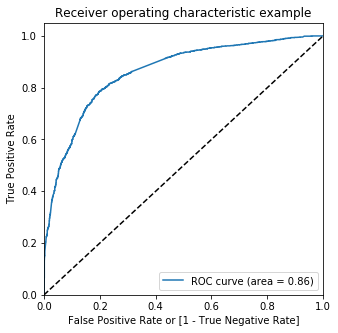

In [92]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step-8: Finding Optimal Cutoff Point

#### 8.1 Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [93]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead_ID,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,4034,0,0.301132,0,1,1,1,1,0,0,0,0,0,0
1,5214,0,0.247347,0,1,1,1,0,0,0,0,0,0,0
2,207,0,0.171843,0,1,1,0,0,0,0,0,0,0,0
3,2044,0,0.178093,0,1,1,0,0,0,0,0,0,0,0
4,4485,1,0.866426,1,1,1,1,1,1,1,1,1,1,0


In [94]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.486092  1.000000  0.000000
0.1   0.1  0.537909  0.993539  0.106940
0.2   0.2  0.693585  0.943701  0.457006
0.3   0.3  0.734634  0.912321  0.566565
0.4   0.4  0.788919  0.804799  0.773898
0.5   0.5  0.788470  0.740194  0.834134
0.6   0.6  0.776357  0.676511  0.870799
0.7   0.7  0.738448  0.548223  0.918376
0.8   0.8  0.710408  0.455468  0.951550
0.9   0.9  0.641319  0.281495  0.981667


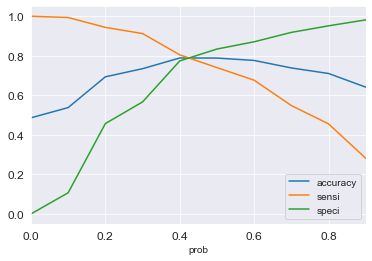

In [95]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

sns.set_style('darkgrid')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.2), size = 12)
plt.yticks(size = 12)
plt.show()

#### 8.2 Finalizing Cutoff
From the curve above, 0.41 is the optimum point to take it as a cutoff probability.

In [96]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Lead_ID,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,4034,0,0.301132,0,1,1,1,1,0,0,0,0,0,0,0
1,5214,0,0.247347,0,1,1,1,0,0,0,0,0,0,0,0
2,207,0,0.171843,0,1,1,0,0,0,0,0,0,0,0,0
3,2044,0,0.178093,0,1,1,0,0,0,0,0,0,0,0,0
4,4485,1,0.866426,1,1,1,1,1,1,1,1,1,1,0,1


### Step-9: Model Evaluation

In [97]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7929564827276806

In [98]:
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_2

array([[1816,  475],
       [ 448, 1719]])

In [99]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

#### 9.1 Sensitivity

In [100]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7932625749884633

#### 9.2 Specificity

In [101]:
# Let us calculate specificity
TN / float(TN+FP)

0.7926669576604103

#### 9.3 Other Metrics
False postive rate

In [102]:
# Calculate false postive rate - predicting Converted when customer does not have Converet
print(FP/ float(TN+FP))

0.2073330423395897


#### 9.4 Positive predictive rate

In [103]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7835004557885141


#### 9.5 Negative predictive rate

In [104]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8021201413427562


#### 9.6 Precision and Recall

In [105]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion

array([[1816,  475],
       [ 448, 1719]])

##### Precision
TP / TP + FP

In [106]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7835004557885141

##### Recall
TP / TP + FN

In [107]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7932625749884633

##### Now by using using sklearn utilities

In [108]:
from sklearn.metrics import precision_score, recall_score

In [109]:
#Precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7835004557885141

In [110]:
#Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7932625749884633

##### 9.7 Precision and recall tradeoff

In [111]:
from sklearn.metrics import precision_recall_curve

In [112]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

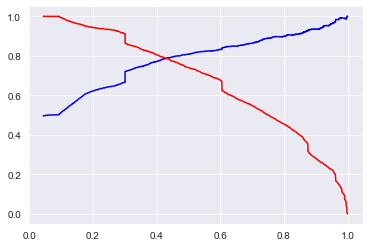

In [113]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Observation:
The model built was 'logm4' and metrics are as follows:

- Accuracy: 79.1%
- Sensitivity/Recall: 79.3%
- Specificity: 79.2%
- Precision: 78.3%


#### By looking at the Evaluation we have built a decent model with all metrices coming to nearly 80%.

### Step-10: Making Predictions on the Test Data

In [114]:
# transfrom the numerical columns using scaler.transform()
X_test[num_col] = scaler.transform(X_test[num_col])

In [115]:
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable',
       'Specialization_Hospitality Management'],
      dtype='object')

In [116]:
X_test = X_test[X_train.columns]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Unreachable,Specialization_Hospitality Management
7486,0,0.261905,0.461708,0.146667,0,0,0,0,1,0,0,0
7838,1,0.047619,0.141285,0.133333,0,0,0,0,1,0,0,0
6260,0,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0
4077,0,0.047619,0.142165,0.133333,0,0,0,0,0,0,0,0
1257,0,0.142857,0.131162,0.400000,0,0,0,0,1,0,0,0


In [117]:
# add constant
X_test_sm = sm.add_constant(X_test)


In [118]:
X_test_sm.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Unreachable,Specialization_Hospitality Management
7486,1.0,0,0.261905,0.461708,0.146667,0,0,0,0,1,0,0,0
7838,1.0,1,0.047619,0.141285,0.133333,0,0,0,0,1,0,0,0
6260,1.0,0,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0
4077,1.0,0,0.047619,0.142165,0.133333,0,0,0,0,0,0,0,0
1257,1.0,0,0.142857,0.131162,0.400000,0,0,0,0,1,0,0,0


In [119]:
y_test_pred = mod4.predict(X_test_sm)

In [120]:
y_test_pred[:10]

7486    0.868037
7838    0.148050
6260    0.301132
4077    0.164471
1257    0.393743
5256    0.374182
4338    0.940476
2089    0.800216
7412    0.896102
3628    0.754537
dtype: float64

In [121]:
# creating a dataframe for test set
y_pred_final = pd.DataFrame({'Lead_ID': y_test.index, 'Converted': y_test.values, 'Converted_prob': y_test_pred.values, 
                            'Lead_Score': np.round((y_test_pred.values*100),2)})
y_pred_final.head()

,Lead_ID,Converted,Converted_prob,Lead_Score
0,7486,1,0.868037,86.80
1,7838,0,0.148050,14.80
2,6260,0,0.301132,30.11
3,4077,0,0.164471,16.45
4,1257,1,0.393743,39.37


In [122]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Lead_ID,Converted,Converted_prob,Lead_Score,final_predicted
0,7486,1,0.868037,86.80,1
1,7838,0,0.148050,14.80,0
2,6260,0,0.301132,30.11,0
3,4077,0,0.164471,16.45,0
4,1257,1,0.393743,39.37,0


##### Lead scores can be derived from the predicted probabilities

In [123]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7760334903192047

In [124]:
confusion_2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_2

array([[785, 229],
       [199, 698]])

In [125]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [126]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.778149386845039

In [127]:
# Let us calculate specificity
TN / float(TN+FP)

0.7741617357001972

In [128]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7529665587918015

In [129]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.778149386845039

#### Observation:
Model Evaluation on Test set:

- Accuracy: 77.6%
- Sensitivity/Recall: 77.8%
- Specificity: 77.4%
- Precision: 75.2%


### Step 11: Business Strategy Report

#### Checking for Variables which variables in the model contribute most towards the probability of a lead getting converted

In [130]:
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4458
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.9
Date:                Thu, 11 Nov 2021   Deviance:                       4147.8
Time:                        20:49:56   Pearson chi2:                 4.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2599      0.109    -20.664      0.000      -2.474      -2.046
Do Not Email                                            -1.3874      0.191     -7.279      0.000      -1.761      -1.014
TotalVisits                                              3.7764      0.613      6.163      0.000       2.575       4.977
Total Time Spent on Website                              4.5445      0.188     24.193      0.000       4.176       4.913
Page Views Per Visit                                    -1.4352      0.408     -3.520      0.000      -2.234      -0.636
Lead Source_Olark Chat                                   1.4180      0.133     10.638      0.000       1.157       1.679
Lead Source_Reference                                    4.2038      0.273     15.384      0.000       3.668       4.739
Lead Source_Welingak Website                             6.2236      1.013      6.141      0.000       4.237       8.210
Last Activity_Had a Phone Conversation                   2.2479      0.702      3.202      0.001       0.872       3.624
Last Activity_SMS Sent                                   1.2668      0.083     15.325      0.000       1.105       1.429
What is your current occupation_Working Professional     2.6459      0.197     13.445      0.000       2.260       3.032
Last Notable Activity_Unreachable                        2.8000      0.805      3.480      0.001       1.223       4.377
Specialization_Hospitality Management                   -1.0893      0.344     -3.163      0.002      -1.764      -0.414
========================================================================================================================
"""

#### Observation : 
-The top 3 variables that contributed towards leads being converted after analysing the coefficient values:

1.Lead Source

2.Total Time Spent on Website

3.TotalVisits


-Top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?

1.Lead Source_Welingak Website

2.Lead Source_Reference

3.Last Notable Activity_Unreachable